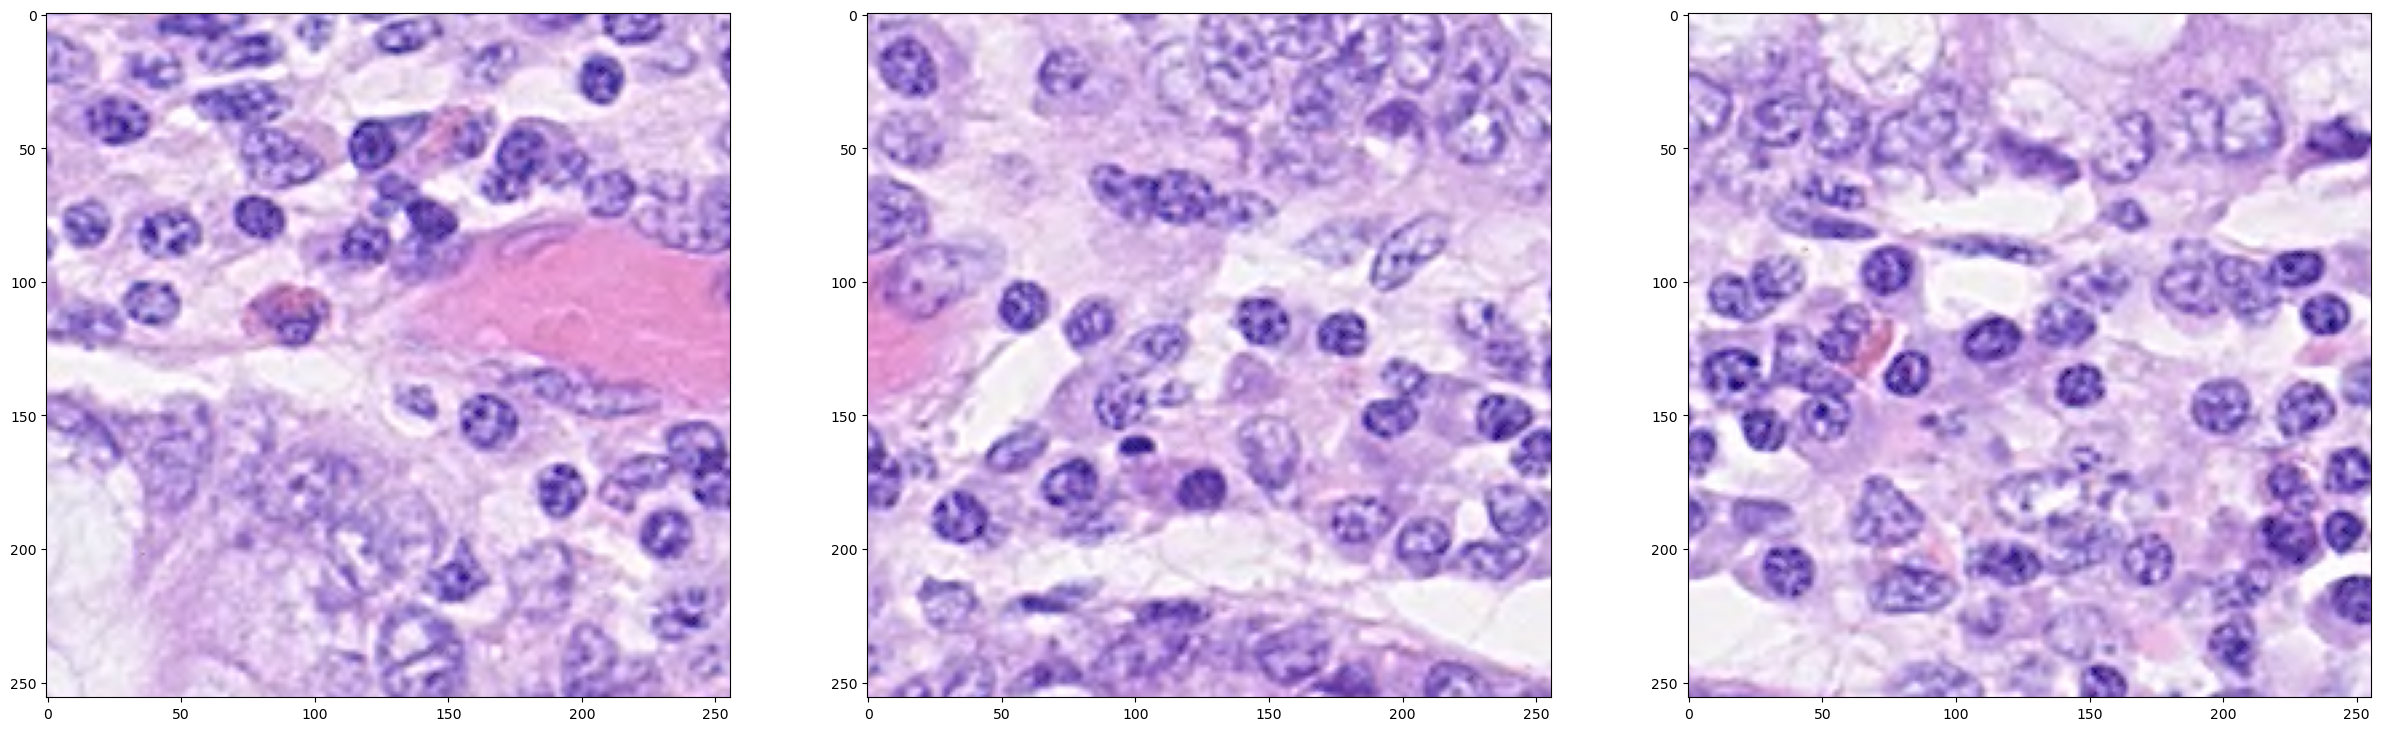

In [1]:
import matplotlib.pyplot as plt
from albumentations import Flip, ShiftScaleRotate, RandomRotate90, RandomCrop
from src.datasets import HEDataset,ConsepDataset

MoNuSegdisplay_set = ConsepDataset(data_dir = './CoNSeP', option = 'Train')
MoNu_0 = MoNuSegdisplay_set[0]
MoNu_1 = MoNuSegdisplay_set[1]
MoNu_2 = MoNuSegdisplay_set[2]

fig,axes = plt.subplots(1,3, figsize=(30,10))

axes[0].imshow(MoNu_0["images"].numpy().transpose(1,2,0))
axes[1].imshow(MoNu_1["images"].numpy().transpose(1,2,0))
axes[2].imshow(MoNu_2["images"].numpy().transpose(1,2,0))

In [2]:
from utils import file_utils as hu
ponet_exp_dict ={
    "batch_size": 1,
    "lr": 0.001,
    "max_epoch": 20,
    "model": {
        "name": "ponet"
        
    },
    "optimizer": "adam"
}

hu.save_json("exp_config_ponet.json", ponet_exp_dict)

In [3]:
import albumentations as A
from src.datasets import HEDataset
import random
import matplotlib.pyplot as plt

In [ ]:
data_transform = A.Compose([A.Flip(p=0.3),
                        A.Affine(p=0.3),
                        A.Rotate(p=0.3),
                        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.3),
                        A.GaussianBlur(3, p=0.3),
                        A.GaussNoise(30, p=0.3)],
                        keypoint_params=A.KeypointParams(format='yx'),
                        additional_targets={'mask0': 'mask',
                                            'mask1': 'mask',
                                            'mask2': 'mask',
                                            'keypoints0': 'keypoints',
                                            'keypoints1': 'keypoints',
                                            'keypoints2': 'keypoints',
                                            'keypoints3': 'keypoints',
                                            'keypoints4': 'keypoints',
                                            'keypoints5': 'keypoints'})

# random.seed(20201009)
random_seed = random.randint(0, 20201009)

In [5]:
import glob,os
from trainval import trainval


datadir = './CoNSeP/' 
exp_dict = hu.load_json('exp_config_ponet.json')
exp_dict["batch_size"] = 64
exp_dict["max_epoch"] = 100

ImportError: attempted relative import with no known parent package